# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Predicting Terrorism / Bayesian Inference (Mini)

Over the course of the last week, we've been investigating Bayesian methods to understand various populations. This project calls on you to apply Bayesian inference (and other tactics) to a fascinating dataset: the Global Terrorism Database.

## About the Dataset





### Part One: EDA

You should gain an understanding of the attacks (focus on `attacktype1`), their distribution across the world, and their frequency.

You will discover different things than your classmates on this portion. Your presentation should include compelling visualizations describing terror incidents around the world.

You are **required** to produce at least one visualization that is indexed by time. For example, the number of bombings that occurred by year over time.




In [1]:
import pandas as pd

In [51]:
data = pd.read_csv('/Users/brookeneubauer/Desktop/project/Terrorism/globalterrorismdb_0616dist.csv')

In [6]:
data_1993 = pd.read_csv('/Users/brookeneubauer/Desktop/project/Terrorism/gtd1993_0616dist.csv')

In [11]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [63]:
data.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,MANO-D,NaN,NaN,NaN,NaN,3629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [81]:
cleaner_data = cleaner_data[cleaner_data['iday'] != 0]

In [84]:
from datetime import datetime


cleaner_data['Date'] = cleaner_data.apply(lambda x: datetime(x['iyear'], x['imonth'], x['iday']), axis=1)

In [80]:
cleaner_data = cleaner_data[cleaner_data['success']==1]

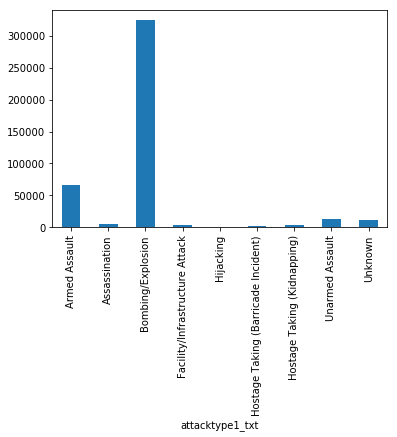

In [288]:
cleaner_data.groupby('attacktype1_txt').nwound.sum().plot(kind='bar')

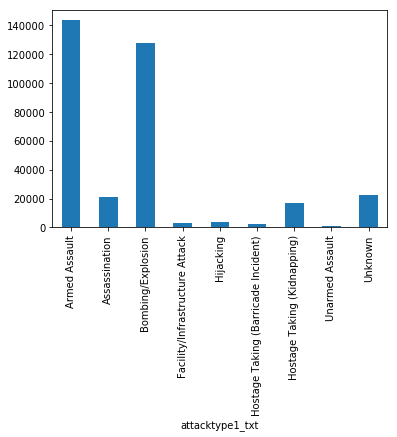

In [289]:
cleaner_data.groupby('attacktype1_txt').nkill.sum().plot(kind='bar')

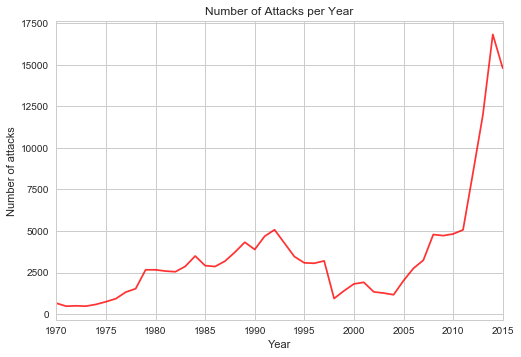

In [305]:
import matplotlib.pyplot as plt
data.groupby('iyear').attacktype1_txt.count().plot(kind="line", color='r', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of Attacks per Year')

In [9]:
def eda(dataframe): #Ritkas code chunk to check quality of data
    print "missing values \n", dataframe.isnull().sum() #shows total amount of null values for each column
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape     
    print "dataframe describe \n", dataframe.describe()
    print "dataframe length =", len(dataframe) #length of the dataframe
    print "duplicates", dataframe.duplicated().sum() # added this to duplicates in the data
    for item in dataframe:
        print item
        print dataframe[item].nunique()

In [10]:
eda(data), approxidate, resolution

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            100420
propextent_txt             0
propvalue             12546

In [27]:
for i in data:
    if data[i].isnull().sum() > 156000:
        print i, data[i].isnull().sum()

attacktype3 156460
gsubname2 156651
gname3 156608
ingroup3 156608
gsubname3 156766
guncertain3 156612
claimmode2 156367
claim3 156614
claimmode3 156696
weaptype4 156698
weapsubtype4 156701
divert 156483
ransomamtus 156361
ransompaid 156149
ransompaidus 156370
ransomnote 156351


In [78]:
cleaner_data = data.drop(['attacktype3','gsubname2','gname3', 'ingroup3','gsubname3', 'guncertain3', 'claimmode2', 'claim3', 'claimmode3', 'weaptype4', 'weapsubtype4', 'divert','ransomamtus', 'ransompaid', 'ransompaidus','ransomnote'], axis=1)
#more than 156,000 missing values (not worth keeping)

In [55]:
cleaner_data.alternative_txt.value_counts()

NAN                           132536
Insurgency/Guerilla Action     19228
Other Crime Type                3409
Intra/Inter-group Conflict      1187
State Actors                     226
Lack of Intentionality           186
Name: alternative_txt, dtype: int64

In [79]:
cleaner_data.replace(to_replace=".", value = 'NAN', inplace= True)

In [56]:
cleaner_data.country_txt.value_counts()

Iraq                                18770
Pakistan                            12768
India                                9940
Afghanistan                          9690
Colombia                             8077
Peru                                 6085
Philippines                          5576
El Salvador                          5320
United Kingdom                       4992
Turkey                               3557
Thailand                             3338
Spain                                3239
Sri Lanka                            2982
Somalia                              2890
Nigeria                              2888
Algeria                              2720
United States                        2693
France                               2617
Yemen                                2598
Lebanon                              2413
Chile                                2334
Russia                               2104
Israel                               2085
Guatemala                         

In [60]:
cleaner_data.attacktype1.value_counts(), cleaner_data.attacktype1_txt.value_counts()

(3    75963
 2    37554
 1    17582
 6     9115
 7     8849
 9     5490
 5      835
 8      828
 4      556
 Name: attacktype1, dtype: int64, Bombing/Explosion                      75963
 Armed Assault                          37554
 Assassination                          17582
 Hostage Taking (Kidnapping)             9115
 Facility/Infrastructure Attack          8849
 Unknown                                 5490
 Hostage Taking (Barricade Incident)      835
 Unarmed Assault                          828
 Hijacking                                556
 Name: attacktype1_txt, dtype: int64)

#Columns to keep
Date, country_txt,region_txt, lat, long, attacktype1_txt = BOMBING/EXPLOSION,nwound, targtype1_txt,nkill, gname 

In [195]:
final_data = cleaner_data[['Date', 'iyear', 'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1_txt', 'nwound', 'targtype1_txt', 'nkill', 'gname']]



In [196]:
final_data.head(5)

,Date,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
5,1970-01-01,1970,United States,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists
7,1970-01-02,1970,United States,North America,37.805065,-122.273024,Bombing/Explosion,0.0,Utilities,0.0,Unknown
8,1970-01-02,1970,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,Military,0.0,New Year's Gang
9,1970-01-03,1970,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,Government (General),0.0,New Year's Gang
11,1970-01-06,1970,United States,North America,39.740010,-104.992259,Facility/Infrastructure Attack,0.0,Military,0.0,Left-Wing Militants


In [89]:
final_data.shape

(140843, 10)

## Impute 1993
The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on attacktype1 bombings (category 3, as per the codebook)
For this section, you should determine a methodology that allows you to best fill in the missing values. Perhaps you want to consider hemispheres to be separate models, for example. (That's the only hint you'll receive - and even that hint is not an optimal option.)
Once you've created your methodology and imputed the number of bombings in 1993, you should feel free to apply your methodology to OTHER attack categories. (Bonus opportunity: turn your method into a pipeline. Use that pipeline to fill in other missing attack values.)

In [109]:
rolling = final_data[final_data['attacktype1_txt']== 'Bombing/Explosion']

In [110]:
a = pd.get_dummies(rolling['attacktype1_txt'] )

In [111]:
rolling = pd.concat([rolling, a], axis=1)

In [112]:
rolling = rolling.drop(['country_txt',  'latitude', 'longitude', 'attacktype1_txt', 'nwound', 'targtype1_txt', 'nkill', 'gname'], axis=1)

In [113]:
rolling.head()

,Date,region_txt,Bombing/Explosion
7,1970-01-02,North America,1
15,1970-01-10,Eastern Europe,1
17,1970-01-12,North America,1
18,1970-01-12,North America,1
22,1970-01-19,North America,1


In [140]:
rolling.index = rolling['Date']

In [175]:
show = rolling.resample('A').sum()

In [129]:
ffv = rolling.groupby([pd.TimeGrouper('12M'), 'region_txt'])

In [130]:
ffv['Bombing/Explosion'].count()

Date        region_txt                 
1970-01-31  Eastern Europe                    1
            North America                    10
            Southeast Asia                    1
1971-01-31  Australasia & Oceania             1
            Eastern Europe                    7
            Middle East & North Africa       17
            North America                   214
            South America                    12
            Southeast Asia                    4
            Western Europe                   13
1972-01-31  Australasia & Oceania             1
            East Asia                         1
            Eastern Europe                    1
            Middle East & North Africa       31
            North America                   118
            South America                     2
            Southeast Asia                    1
            Western Europe                   48
1973-01-31  Australasia & Oceania             2
            Central America & Caribbean       2


In [141]:
rolling['year'] = rolling.index.year

In [138]:
abc = rolling.groupby([rolling.index, 'region_txt'])

In [136]:
rolling.index = rolling.index.year

In [177]:
show = show.drop(['year'], axis=1)

In [186]:
show

,Bombing/Explosion
Date,
1970-12-31,265.0
1971-12-31,206.0
1972-12-31,154.0
1973-12-31,125.0
1974-12-31,260.0
1975-12-31,335.0
1976-12-31,379.0
1977-12-31,556.0
1978-12-31,592.0


In [154]:
a = rolling.groupby(['year', 'region_txt']).sum()

In [155]:
type(a)

pandas.core.frame.DataFrame

In [156]:
a.head()

Bombing/Explosion
year region_txt                                   
1970 Australasia & Oceania                     1.0
     Eastern Europe                            8.0
     Middle East & North Africa               13.0
     North America                           217.0
     South America                            11.0

In [187]:
show.head()

,Bombing/Explosion
Date,
1970-12-31,265.0
1971-12-31,206.0
1972-12-31,154.0
1973-12-31,125.0
1974-12-31,260.0


In [157]:
import numpy as np


In [181]:
under_1993 = show['1970':'1992']

In [182]:
under_1993.head()

,Bombing/Explosion
Date,
1970-12-31,265.0
1971-12-31,206.0
1972-12-31,154.0
1973-12-31,125.0
1974-12-31,260.0


In [170]:
a.reset_index(inplace = True)

In [183]:
rolmean13 = pd.rolling_mean(under_1993, window = 1)

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  if __name__ == '__main__':


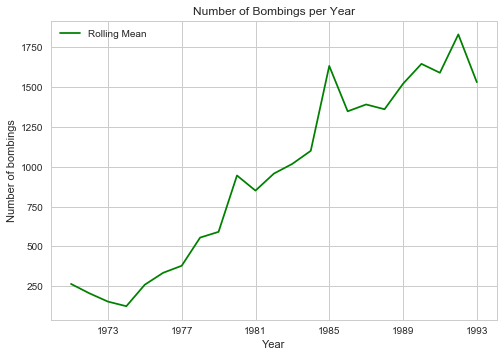

In [313]:
import matplotlib.pyplot as plt
mean = plt.plot(rolmean13, color='green', label='Rolling Mean')
# fig = plt.figure(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Number of bombings')
plt.title('Number of Bombings per Year')
plt.legend(loc='best')


In [190]:
(1591+832+1532+1004+701+1031)/6

1115

In [189]:
show (1591.0
832.0
1532.0)
1004.0
701.0
1031.0

,Bombing/Explosion
Date,
1970-12-31,265.0
1971-12-31,206.0
1972-12-31,154.0
1973-12-31,125.0
1974-12-31,260.0
1975-12-31,335.0
1976-12-31,379.0
1977-12-31,556.0
1978-12-31,592.0


In [191]:
show.replace(to_replace= np.nan, value = 1115, inplace = True)

In [192]:
show

,Bombing/Explosion
Date,
1970-12-31,265.0
1971-12-31,206.0
1972-12-31,154.0
1973-12-31,125.0
1974-12-31,260.0
1975-12-31,335.0
1976-12-31,379.0
1977-12-31,556.0
1978-12-31,592.0


## Bayesian Inference
Bayesian Inference¶
Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.
Because of this, we should construct a prior about the amount of terror a given area has seen and update that prior with new information (like a new year of attacks or a contrasting country from within the same region).
You should compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)
For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)
You should structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your squad in the Slack chat.
You must justify the prior you selected and interpret your results (use credible intervals.) Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

In [193]:
import pymc3 as pm

In [197]:
final_data.head()

,Date,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
5,1970-01-01,1970,United States,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists
7,1970-01-02,1970,United States,North America,37.805065,-122.273024,Bombing/Explosion,0.0,Utilities,0.0,Unknown
8,1970-01-02,1970,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,Military,0.0,New Year's Gang
9,1970-01-03,1970,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,Government (General),0.0,New Year's Gang
11,1970-01-06,1970,United States,North America,39.740010,-104.992259,Facility/Infrastructure Attack,0.0,Military,0.0,Left-Wing Militants


In [ ]:
mean_prior_mean = star.APM.mean()
mean_prior_std = star.APM.std()

In [204]:
germany = final_data[final_data['country_txt'] == 'Germany']

In [208]:
final_data.targtype1_txt.value_counts()

Private Citizens & Property       33512
Military                          21133
Police                            19403
Business                          17410
Government (General)              16304
Transportation                     5776
Utilities                          5202
Educational Institution            3574
Religious Figures/Institutions     3573
Government (Diplomatic)            2787
Journalists & Media                2384
Terrorists/Non-State Militia       2342
Unknown                            1677
Violent Political Party            1414
Airports & Aircraft                1095
Telecommunication                   871
NGO                                 811
Other                               438
Tourists                            379
Maritime                            285
Food or Water Supply                262
Abortion Related                    211
Name: targtype1_txt, dtype: int64

In [206]:
armed.head()

,Date,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
5,1970-01-01,1970,United States,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists
21,1970-01-15,1970,Uruguay,South America,-34.891151,-56.187214,Armed Assault,0.0,Educational Institution,0.0,Tupamaros (Uruguay)
30,1970-01-25,1970,United States,North America,40.783060,-73.971249,Armed Assault,2.0,Police,0.0,Black Nationalists
32,1970-01-26,1970,United States,North America,40.728224,-73.794852,Armed Assault,0.0,Police,0.0,Black Nationalists
42,1970-02-01,1970,United States,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists


In [253]:
s = final_data[final_data['country_txt']=='United States']

In [234]:
s.head()

,Date,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
66,1970-02-16,1970,United States,North America,37.777125,-122.419644,Bombing/Explosion,0.0,Police,1.0,Unknown
111,1970-03-05,1970,United States,North America,18.466170,-66.106654,Assassination,0.0,Military,2.0,Armed Commandos of Liberation
142,1970-03-20,1970,United States,North America,42.331685,-83.047924,Assassination,0.0,Private Citizens & Property,1.0,White Extremists
223,1970-04-24,1970,United States,North America,39.290555,-76.609604,Armed Assault,1.0,Police,1.0,Black Panthers
274,1970-05-09,1970,United States,North America,38.551295,-121.471066,Armed Assault,0.0,Police,1.0,Black Nationalists


In [254]:
x = final_data[final_data['country_txt']=='Mexico']

Looking at the terrorist attacks in US vs Mexico where someone died after 2001
prior 2001 and before

In [247]:
x.head()

,Date,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
1986,1973-10-10,1973,Mexico,North America,20.673343,-103.344177,Hostage Taking (Kidnapping),0.0,Business,1.0,Revolutionary Student Front
2220,1974-03-22,1974,Mexico,North America,29.089186,-110.961330,Hostage Taking (Kidnapping),0.0,Government (Diplomatic),1.0,People's Liberation Army (Mexico)
2279,1974-04-27,1974,Mexico,North America,19.432608,-99.133207,Armed Assault,0.0,Police,1.0,Unknown
2696,1975-01-28,1975,Mexico,North America,19.600000,-99.050000,Armed Assault,NaN,Business,1.0,23rd of September Communist League
2889,1975-04-25,1975,Mexico,North America,19.432608,-99.133207,Armed Assault,NaN,Business,12.0,23rd of September Communist League


In [241]:
usa = s.iyear.value_counts().values
mexico = x.iyear.value_counts().values

In [256]:
combined = pd.concat([x,s], axis=0)

In [260]:
combined = combined.sort('Date')

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [261]:
combined.head()

,Date,iyear,country_txt,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
5,1970-01-01,1970,United States,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists
7,1970-01-02,1970,United States,North America,37.805065,-122.273024,Bombing/Explosion,0.0,Utilities,0.0,Unknown
8,1970-01-02,1970,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,Military,0.0,New Year's Gang
9,1970-01-03,1970,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,Government (General),0.0,New Year's Gang
11,1970-01-06,1970,United States,North America,39.740010,-104.992259,Facility/Infrastructure Attack,0.0,Military,0.0,Left-Wing Militants


In [263]:
combined = combined[combined['nkill'] >0]

In [264]:
combined_prior = combined[(combined.iyear < 2002)]

In [265]:
combined_after = combined[(combined.iyear >= 2002)]

In [266]:
usa = combined_after[combined_after.country_txt.str.contains('United States')].iyear.value_counts().values
mexico = combined_after[combined_after.country_txt.str.contains('Mexico')].iyear.value_counts().values

In [269]:
mean_prior_mean = combined_prior.iyear.value_counts().mean()
mean_prior_std = combined_prior.iyear.value_counts().std()

print mean_prior_mean
print mean_prior_std

12.0967741935
12.1856605312


In [270]:
#INSTANTIATE MODEL
with pm.Model() as model:

    usa_mean = pm.Normal('usa_mean', mean_prior_mean, sd=mean_prior_std)
    mexico_mean = pm.Normal('mexico_mean', mean_prior_mean, sd=mean_prior_std)

In [271]:
std_prior_lower = 0.001
std_prior_upper = 25.0

with model:
    
    usa_std = pm.Uniform('usa_std', lower=std_prior_lower, upper=std_prior_upper)
    mexico_std = pm.Uniform('mexico_std', lower=std_prior_lower, upper=std_prior_upper)

In [275]:
with model:

    AMERICA = pm.Normal('uhmerica', mu=usa_mean, sd=usa_std, observed=usa)
    andmexico = pm.Normal('mexi', mu=mexico_mean,sd=mexico_std, observed=mexico)

In [276]:
with model:

    diff_of_means = pm.Deterministic('difference of means', usa_mean - mexico_mean)
    diff_of_stds = pm.Deterministic('difference of stds', usa_std - mexico_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((usa_std**2 + mexico_std**2) / 2))

In [277]:
with model:
    trace = pm.sample(20000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -128.1: 100%|██████████| 200000/200000 [00:25<00:00, 7799.93it/s] 
Finished [100%]: Average ELBO = -128.08
100%|██████████| 20000/20000 [01:22<00:00, 243.53it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14bda5fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x149434790>], dtype=object)

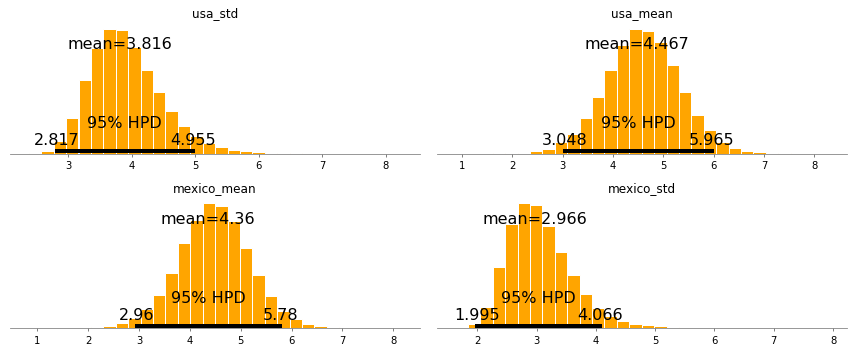

In [281]:
pm.plot_posterior(trace[3000:],
                  varnames=['usa_mean', 'mexico_mean', 'usa_std', 'mexico_std'],
                  color='orange')

In [279]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14b982390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14b5c2150>], dtype=object)

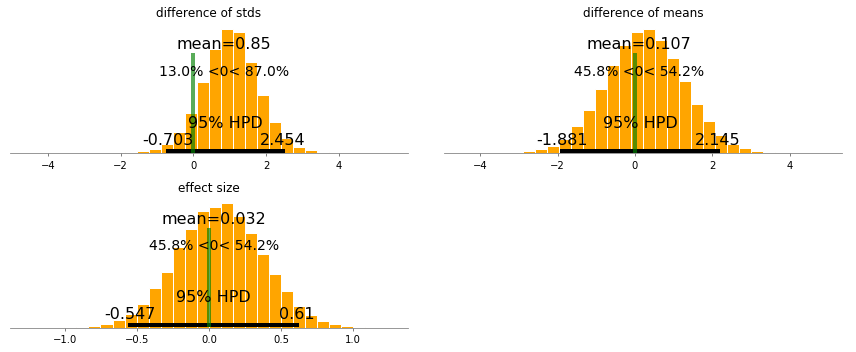

In [282]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='orange')

In [283]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.107            1.025            0.004            [-1.881, 2.145]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.912         -0.573         0.110          0.783          2.118


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.850            0.792            0.004            [-0.703, 2.454]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.739         0.354          0.856          1.353          2.423


effect size:

  Mean             SD               MC Error         95% HPD i

### Part Four: Methods

Please draft a max two page (or four pages double spaced) report discussing your methodology and findings. Visualizations may be included in an appendix.

Your write-up should have two parts: the Bayesian test you constructed and the values you imputed for 1993 attacks.

In your Bayesian inference section, be sure to defend your prior. Comment on your results of the differing populations.

In your missing value imputation modelling portion, justify the model or tactic you used. Bear in mind simply averaging by hemisphere can, theoretically, be a solution. Err on the side of simple and elegant rather than complex to be complex.

Methodology

When approaching the baysian inference aspect of this project, there were so many things to look at. I decided to look closer to home, so I was looking at the terrorist attacks in U.S. vs Mexico where someone died after the year 2001.
My prior was the mean terrorist attacks in the U.S. and Mexico before 2002 where someone passed away. Both of these coutries are had a similiar amount of terrorist attacks with deaths so I wanted to look at post 9/11 to see if the U.S. would have a decrease or increase as compared to it's neighbor, Mexico. 
The difference between the U.S. and Mexico posterior distributions of the parameters were not statistically significant. The prior I chose was very broad for the two countries I was looking at. If I were to run this again I would like to look at all terrorism in Mexico and U.S.A and look at the target being police to see if there is a significant difference between the two countries and attacks towards the police.

Predicting the 1993 bombings:

When looking to impute the 1993 bombing I looked at what I needed. I initially was thinking of determining bombings per region, and then decided that i wanted to find total bombings for the world. So I grouped by date and an attack type equal to bombing. When imputing the data I was only lookign for successful bomings. I executed a rolling mean graph to be able to visualize the rolling mean counts for each year. I then took the three years before 1993 and the 3 years following and took the mean of the those six years. My expected 1993 bombings were 1115. The caveat is that I didn not include failed bombings in my analysis, which would make my mean quite a bit larger.